# Company & Dataset Introduction 

**Data Set Information:**

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for UK-based registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.


**Attribute Information:**

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to eac
Country: Country name. Nominal, the name of the country where each customer resides.

# Project Introduction 
Market and customer segmentation are some of the most important tasks for business. To sustain and expand business, companies should realize being able to retain existing customers is as important as exploring new customer. How to sustain customers? To sustain your existing customer, you need to know your customer behaviors well first. Not all the customers are financially attractive to the business and not all customers look at your business the same. Therefore, it is crucial to ensure your best resources allocated are in line with the value a customer carries and customize your marketing strategy to each customer segment to achieve the highest ROI. 

**Objective:**

In this Notebook, I will use powerful machine learning technique called K-means to augment RFM segmentation analysis with the goal of clustering customers into numbers of groups so that marketing team can customize its strategy to maximize influence of customized plans on targeted customer. 


Some Questions to solve: 

1. How many customer segments that we can target? 
2. Who are our best customer? 
3. Which customer segment we are losing? 
4. Which customer segment is most loyal? 
5. What compaign stratgy we should use for each of customer segment? 
6. Does it worth to put marketing effort on each customer segment? 

# Importing File

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In [2]:
online_retail = pd.read_csv('online_retail.csv')

In [3]:
online_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
online_retail.shape

(1067371, 8)

In [5]:
online_retail.info() # some product has no description & no customer ID 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [6]:
online_retail.describe() # Min price and quantity is negative 

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


# Exploratory Data Analysis 

# Data Cleaning 

From above table, we noticed that quantity and price of products could be negative. Let's found out what the negative numbers actually mean here. 

After filtering out positive quantity transaction, we have about 2% records that has negative quantity. And, it seems like most of those negative qunatity records are cancellation orders, but still let's dig it a little bit further to prove it. 

In [7]:
online_retail[online_retail['Quantity'] < 0] # Notice that we have 22950 rows with negative quantity

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [8]:
22950/1067371

0.021501427338760374

Orders that were not cancelled but had negative quantity are either missing or damaged. Only 222 orders out of 1M orders are damaged which means the issue is not much concerned. So, I will drop those records at data cleaning stage. 

In [9]:
online_retail[(online_retail['Quantity'] < 0) & (~online_retail['Invoice'].str.contains('C'))]['Description'].value_counts()

check                                  123
damages                                 84
?                                       83
damaged                                 78
missing                                 27
                                      ... 
Wrongly mrked had 85123a in box          1
Carton qnty was 216 not 144 as stat      1
dirty                                    1
stock creditted wrongly                  1
stock take                               1
Name: Description, Length: 222, dtype: int64

In [10]:
online_retail = online_retail[(online_retail['Quantity'] >0)]
online_retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044421 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1044421 non-null  object 
 1   StockCode    1044421 non-null  object 
 2   Description  1042728 non-null  object 
 3   Quantity     1044421 non-null  int64  
 4   InvoiceDate  1044421 non-null  object 
 5   Price        1044421 non-null  float64
 6   Customer ID  805620 non-null   float64
 7   Country      1044421 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 71.7+ MB


Some customer id is missing as well. Since we cannot randomly assign id to each invoice and the number of missing values in Customer ID is relatively small, I will drop Nan values in Customer ID.

In [11]:
online_retail['Customer ID'].value_counts()

17841.0    12890
14911.0    11247
12748.0     7230
14606.0     6566
14096.0     5111
           ...  
13215.0        1
13205.0        1
13185.0        1
18133.0        1
15313.0        1
Name: Customer ID, Length: 5881, dtype: int64

In [12]:
online_retail.dropna(inplace = True) # drop null value 

In [13]:
online_retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805620 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      805620 non-null  object 
 1   StockCode    805620 non-null  object 
 2   Description  805620 non-null  object 
 3   Quantity     805620 non-null  int64  
 4   InvoiceDate  805620 non-null  object 
 5   Price        805620 non-null  float64
 6   Customer ID  805620 non-null  float64
 7   Country      805620 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 55.3+ MB


In [14]:
online_retail['Customer ID'] = online_retail['Customer ID'].astype('object') # change data type of customer id to object
online_retail.describe()

,Quantity,Price
count,805620.000000,805620.000000
mean,13.307665,3.206279
std,144.306739,29.197901
min,1.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,10953.500000


The standard deviation of Quantity and Price are very large which may be caused by some wholesalers' big order and some special items that are more expansive. Therefore, those customers may be one of our customer segments. 

In [15]:
online_retail [online_retail['Price'] > 50] #items have abnormal stockcode and description are mostly postage,Manual,Post Office Cabinet.


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362,Belgium
6763,489935,21769,VINTAGE POST OFFICE CABINET,1,2009-12-03 10:51:00,79.95,12934,United Kingdom
7334,490023,21769,VINTAGE POST OFFICE CABINET,1,2009-12-03 12:38:00,79.95,16168,United Kingdom
21450,491094,POST,POSTAGE,1,2009-12-09 13:49:00,216.00,12709,Germany
...,...,...,...,...,...,...,...,...
1020188,578270,DOT,DOTCOM POSTAGE,1,2011-11-23 13:39:00,1270.06,14096,United Kingdom
1033920,579196,DOT,DOTCOM POSTAGE,1,2011-11-28 15:54:00,1526.76,14096,United Kingdom
1051476,580645,M,Manual,1,2011-12-05 13:11:00,219.50,17857,United Kingdom
1053544,580727,DOT,DOTCOM POSTAGE,1,2011-12-05 17:17:00,1599.26,14096,United Kingdom


In [16]:
online_retail [online_retail['Price'] == 10953.500000] # special item that has highest price is manual 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
135013,502263,M,Manual,1,2010-03-23 15:22:00,10953.5,12918,United Kingdom


In [17]:
online_retail [online_retail['Description'] == 'Manual']# not all Manual orders is expensive 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
11310,490300,M,Manual,1,2009-12-04 14:19:00,0.85,12970,United Kingdom
11311,490300,M,Manual,1,2009-12-04 14:19:00,0.21,12970,United Kingdom
16107,490727,M,Manual,1,2009-12-07 16:38:00,0.00,17231,United Kingdom
17386,490760,M,Manual,1,2009-12-08 09:49:00,10.00,14295,United Kingdom
17887,490881,M,Manual,1,2009-12-08 12:58:00,10.00,16210,United Kingdom
...,...,...,...,...,...,...,...,...
1051476,580645,M,Manual,1,2011-12-05 13:11:00,219.50,17857,United Kingdom
1051479,580646,M,Manual,800,2011-12-05 13:13:00,0.25,17857,United Kingdom
1056337,580884,M,Manual,1,2011-12-06 12:21:00,0.85,15907,United Kingdom
1056893,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841,United Kingdom


In [18]:
online_retail[online_retail ['Description'] == 'POSTAGE']#not every postage is expensive 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.0,12682,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.0,12636,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.0,12362,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.0,12533,Germany
1244,489557,POST,POSTAGE,4,2009-12-01 12:52:00,18.0,12490,France
...,...,...,...,...,...,...,...,...
1066677,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.0,12518,Germany
1067191,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.0,12662,Germany
1067228,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.0,12526,Germany
1067229,581578,POST,POSTAGE,3,2011-12-09 12:16:00,18.0,12713,Germany


In [19]:
online_retail [online_retail['Quantity'] > 10000] # The large quantity order has lowest price item so these orders may be from wholesalers 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
90857,497946,37410,BLACK AND WHITE PAISLEY FLOWER MUG,19152,2010-02-15 11:57:00,0.10,13902,Denmark
127166,501534,21099,SET/6 STRAWBERRY PAPER CUPS,12960,2010-03-17 13:09:00,0.10,13902,Denmark
127167,501534,21092,SET/6 STRAWBERRY PAPER PLATES,12480,2010-03-17 13:09:00,0.10,13902,Denmark
127168,501534,21091,SET/6 WOODLAND PAPER PLATES,12960,2010-03-17 13:09:00,0.10,13902,Denmark
127169,501534,21085,SET/6 WOODLAND PAPER CUPS,12744,2010-03-17 13:09:00,0.10,13902,Denmark
587080,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
1027583,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256,United Kingdom
1065882,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom


Since customer behaviors in different countries may be influenced by its local compaigns or special events and currency unit of each country is different, I will mainly focus on United Kingdom which has the largest number of records in the dataset as you can see below. 


In [20]:
online_retail['Country'].value_counts() # invoices in different countries 

United Kingdom          725296
Germany                  16703
EIRE                     15745
France                   13813
Netherlands               5093
Spain                     3720
Belgium                   3069
Switzerland               3012
Portugal                  2446
Australia                 1815
Channel Islands           1569
Italy                     1468
Norway                    1437
Sweden                    1319
Cyprus                    1155
Finland                   1032
Austria                    922
Denmark                    798
Greece                     657
Unspecified                521
Poland                     512
Japan                      485
USA                        409
United Arab Emirates       383
Singapore                  339
Israel                     322
Malta                      282
Iceland                    253
Canada                     228
Lithuania                  189
RSA                        123
Brazil                      94
Thailand

In [21]:
UK_OL = online_retail[online_retail['Country'] == 'United Kingdom'] # focus on UK region only 
UK_OL.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [22]:
UK_OL.info()# Now we have about 725K records with no missing values. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 725296 entries, 0 to 1067354
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      725296 non-null  object 
 1   StockCode    725296 non-null  object 
 2   Description  725296 non-null  object 
 3   Quantity     725296 non-null  int64  
 4   InvoiceDate  725296 non-null  object 
 5   Price        725296 non-null  float64
 6   Customer ID  725296 non-null  object 
 7   Country      725296 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 49.8+ MB



## RFM Analysis: 

**Based on the attributes of this online datasets, a traditional and good way to segment the customers is to conduct RFM analysis.**

RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns.

RFM Analysis ranks customers based on the following factors: 

Recency. How recent was the customer's last purchase? Customers who recently made a purchase will still have the product on their mind and are more likely to purchase or use the product again. Businesses often measure recency in days. But, depending on the product, they may measure it in years, weeks or even hours. 

Frequency. How often did this customer make a purchase in a given period? Customers who purchased once are often are more likely to purchase again. Additionally, first time customers may be good targets for follow-up advertising to convert them into more frequent customers.

Monetary. How much money did the customer spend in a given period? Customers who spend a lot of money are more likely to spend money in the future and have a high value to a business.

** Steps for RFM Analysis 
1. To conduct RFM analysis, I will calculate Recency, Frequency, Monetary for each customers to form a RFM table.

   1.1 From observation on the frequency of the orders, I will meaure the Rencency in days. 
    
   1.2 The time period for customer purchase Frequency and monetary will be from 01/12/2010 and 09/12/2011 which is also the time period of the entire dataset. 

2. After generated RFM table, I will identify and investigate outliers. 

3. Lastly, I will quantify recency, frequency and monetary and lable each customer with human friendly names. 

# Feature Engineering 

In [23]:
UK_OL['Revenue'] = UK_OL['Price'] * UK_OL['Quantity'] # Prepare for Monetary attribution 

<ipython-input-23-3617aa49610c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UK_OL['Revenue'] = UK_OL['Price'] * UK_OL['Quantity'] # Prepare for Monetary attribution


In [24]:
UK_OL['InvoiceDate'] = pd.to_datetime(UK_OL['InvoiceDate']) # transform object to datetime format 
UK_OL['InvoiceDate']

<ipython-input-24-49f501a84c84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UK_OL['InvoiceDate'] = pd.to_datetime(UK_OL['InvoiceDate']) # transform object to datetime format


0         2009-12-01 07:45:00
1         2009-12-01 07:45:00
2         2009-12-01 07:45:00
3         2009-12-01 07:45:00
4         2009-12-01 07:45:00
                  ...        
1067350   2011-12-09 12:31:00
1067351   2011-12-09 12:49:00
1067352   2011-12-09 12:49:00
1067353   2011-12-09 12:49:00
1067354   2011-12-09 12:49:00
Name: InvoiceDate, Length: 725296, dtype: datetime64[ns]

To calculate the Recency, I set a hypothetical snapshot day so that we can quantify how recent the last purchase of each customer is 

In [25]:

# Hypothetical snapshot day created 
snapshot = UK_OL['InvoiceDate'].max() + pd.to_timedelta(1, unit='d')
snapshot

Timestamp('2011-12-10 12:49:00')

In [26]:
UK_OL['InvoiceDate']

0         2009-12-01 07:45:00
1         2009-12-01 07:45:00
2         2009-12-01 07:45:00
3         2009-12-01 07:45:00
4         2009-12-01 07:45:00
                  ...        
1067350   2011-12-09 12:31:00
1067351   2011-12-09 12:49:00
1067352   2011-12-09 12:49:00
1067353   2011-12-09 12:49:00
1067354   2011-12-09 12:49:00
Name: InvoiceDate, Length: 725296, dtype: datetime64[ns]

In [27]:
UK_OL['Recentency'] = snapshot - UK_OL['InvoiceDate'] 

<ipython-input-27-18798afb3047>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UK_OL['Recentency'] = snapshot - UK_OL['InvoiceDate']


In [28]:
from datetime import timedelta
UK_OL['Recentency'] = round(UK_OL['Recentency'] /timedelta(days = 1))

<ipython-input-28-f5ec77876370>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UK_OL['Recentency'] = round(UK_OL['Recentency'] /timedelta(days = 1))


In [29]:
UK_RFM = UK_OL.groupby('Customer ID').agg({'Recentency' : 'min','Invoice' :'count','Revenue' : 'sum'}) # Recency,frequency, monetary 

In [30]:
UK_RFM = UK_RFM.rename(columns = {'Recentency' : 'Recency', 'Invoice' :'Frequency', 'Revenue':'Monetary'}) # Rename columns
UK_RFM .describe()

,Recency,Frequency,Monetary
count,5353.000000,5353.000000,5353.000000
mean,203.683729,135.493368,2750.447883
std,210.120997,325.997871,12077.255964
min,1.000000,1.000000,0.000000
25%,26.000000,20.000000,335.520000
50%,99.000000,53.000000,848.710000
75%,382.000000,142.000000,2212.280000
max,739.000000,12890.000000,608821.650000


Text(0.5, 1.0, 'Recency Distributiom')

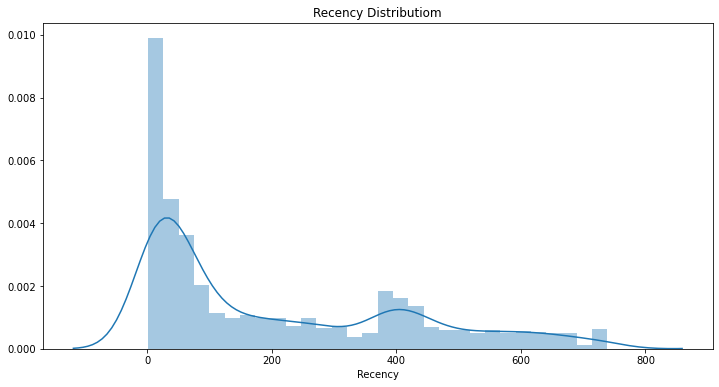

In [31]:
plt.figure(figsize=(12,6))
sns.distplot(UK_RFM['Recency'],bins = 30) #skew to the right 
plt.title('Recency Distributiom')

Text(0.5, 1.0, 'Monetary Distributiom')

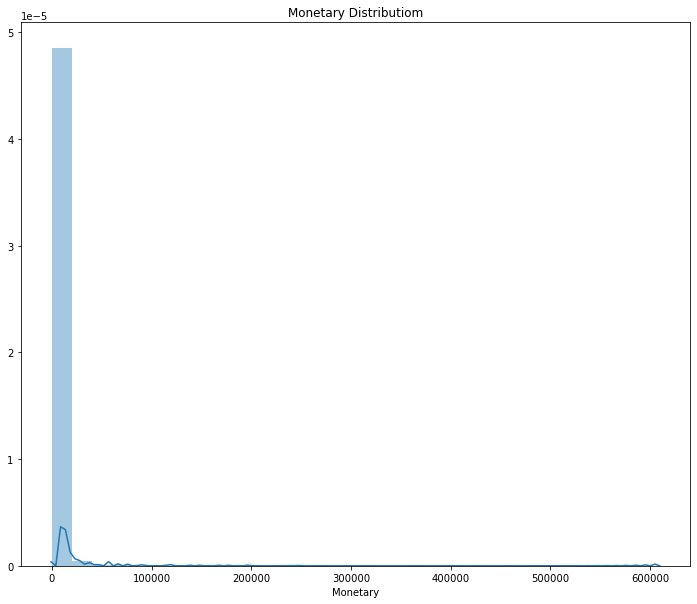

In [32]:
plt.figure(figsize=(12,10))
sns.distplot(UK_RFM['Monetary'],bins = 30) # a few orders are large in terms of money 
plt.title('Monetary Distributiom')

Text(0.5, 1.0, 'Frequency Distribution')

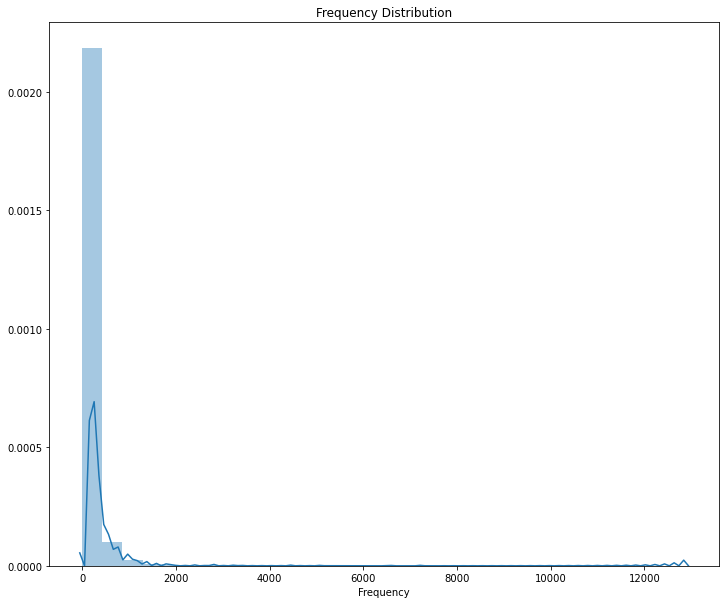

In [33]:
plt.figure(figsize=(12,10))
sns.distplot(UK_RFM['Frequency'],bins = 30) # highly skewed to the right 
plt.title('Frequency Distribution')

Monetary distribution is highly skewed to the right meaning most of data are between 0 and 2K and there are some outliers. In Exploratory analysis, I discovered the same pattern where a number of orders had large quantity. 

Since those outliers are relatively small, I decide to remove the outliers from Monetary attributes to prepare further RFM analysis.

Frequency distribution is highly skwed to the right as well. So, I will remove the outliers from it too. 

In the meanwhile, even though I had a theory that those outliers may be large business customers and special items, I will investigate this "outliers" further after the RFM analysis is done.

## Outlier Investigation 

In [34]:
UK = UK_RFM.copy() #get a copy for outlier investigation 
UK.describe()

,Recency,Frequency,Monetary
count,5353.000000,5353.000000,5353.000000
mean,203.683729,135.493368,2750.447883
std,210.120997,325.997871,12077.255964
min,1.000000,1.000000,0.000000
25%,26.000000,20.000000,335.520000
50%,99.000000,53.000000,848.710000
75%,382.000000,142.000000,2212.280000
max,739.000000,12890.000000,608821.650000


## Identify Outliers 

In [35]:
Q1 = UK.quantile(0.25)
Q3 = UK.quantile(0.75)
IQR = Q3 - Q1
UK_Outlier = UK[((UK < (Q1 - 1.5 * IQR)) |(UK > (Q3 + 1.5 * IQR))).any(axis=1)]
UK_Outlier #outliers

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,326.0,34,77556.46
12747.0,3.0,257,9276.54
12748.0,1.0,7230,56599.39
12749.0,4.0,338,6897.36
12823.0,75.0,18,6501.50
...,...,...,...
18231.0,193.0,385,6880.97
18245.0,8.0,458,6324.98
18251.0,88.0,108,26278.86


In [36]:
Q1 = UK.quantile(0.25)
Q3 = UK.quantile(0.75)
IQR = Q3 - Q1
UK_Outlier_S = UK[(UK_RFM > (Q3 + 1.5 * IQR)).any(axis=1)]
UK_Outlier_S #All the outliers are the ones that significantly larger than others. 

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,326.0,34,77556.46
12747.0,3.0,257,9276.54
12748.0,1.0,7230,56599.39
12749.0,4.0,338,6897.36
12823.0,75.0,18,6501.50
...,...,...,...
18231.0,193.0,385,6880.97
18245.0,8.0,458,6324.98
18251.0,88.0,108,26278.86


In [37]:
UK_Outlier.describe()

,Recency,Frequency,Monetary
count,764.000000,764.000000,764.000000
mean,55.650524,548.869110,12972.454068
std,101.220764,719.767442,29906.359573
min,1.000000,1.000000,1058.720000
25%,8.000000,292.000000,4917.202500
50%,18.000000,398.000000,6854.665000
75%,54.000000,621.750000,11361.960000
max,692.000000,12890.000000,608821.650000


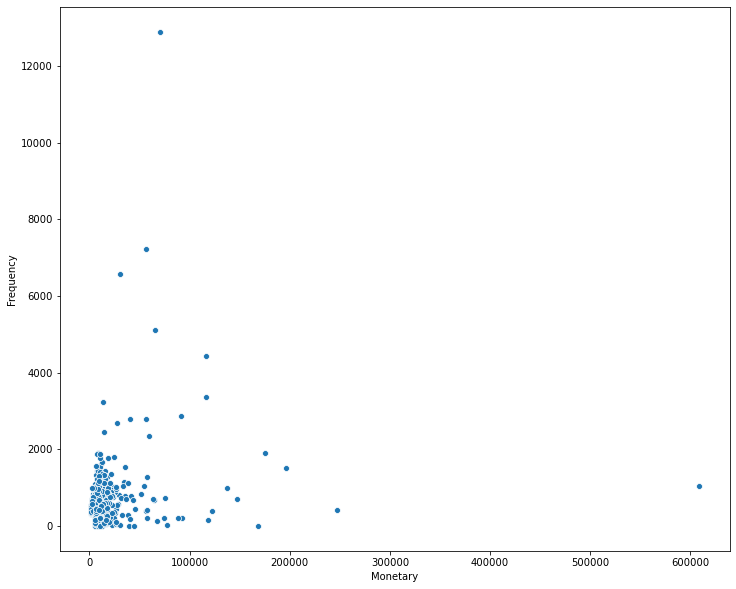

In [38]:
plt.figure(figsize = (12,10))
sns.scatterplot('Monetary','Frequency',data = UK_Outlier)
# Customers are either ones that order less frequent but expensive items or ones that order frequently and spend much money so far. 
#Without knowing the business strategy and its product in detail, I would like to lable those outlier customers as business partner since they are special and order frequently with large bill

In [39]:
#Lable Outliers as Business Partner
UK_Outlier['customer_segment'] = 'Business Partner' 

<ipython-input-39-8c7d4de1dc3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UK_Outlier['customer_segment'] = 'Business Partner'


In [40]:
UK_Outlier 

,Recency,Frequency,Monetary,customer_segment
Customer ID,,,,
12346.0,326.0,34,77556.46,Business Partner
12747.0,3.0,257,9276.54,Business Partner
12748.0,1.0,7230,56599.39,Business Partner
12749.0,4.0,338,6897.36,Business Partner
12823.0,75.0,18,6501.50,Business Partner
...,...,...,...,...
18231.0,193.0,385,6880.97,Business Partner
18245.0,8.0,458,6324.98,Business Partner
18251.0,88.0,108,26278.86,Business Partner


## Clean Up Outlier 

In [41]:
Q1 = UK_RFM.quantile(0.25)
Q3 = UK_RFM.quantile(0.75)
IQR = Q3 - Q1

UK_RFM_Clean = UK_RFM[~((UK_RFM < (Q1 - 1.5 * IQR)) |(UK_RFM > (Q3 + 1.5 * IQR))).any(axis=1)]
UK_RFM_Clean #clean up outlier 

,Recency,Frequency,Monetary
Customer ID,,,
12608.0,405.0,16,415.79
12745.0,487.0,22,723.85
12746.0,541.0,17,254.55
12777.0,458.0,26,519.45
12819.0,459.0,19,540.52
...,...,...,...
18282.0,8.0,12,178.05
18284.0,432.0,28,461.68
18285.0,661.0,12,427.00


After removed outliers, the distribution of both attributes looks way better than before. 

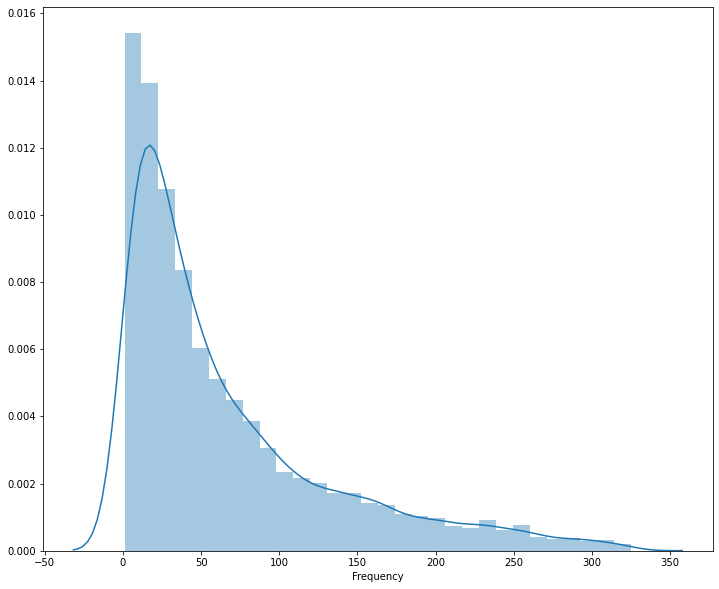

In [42]:
plt.figure(figsize=(12,10))
sns.distplot(UK_RFM_Clean['Frequency'],bins = 30)

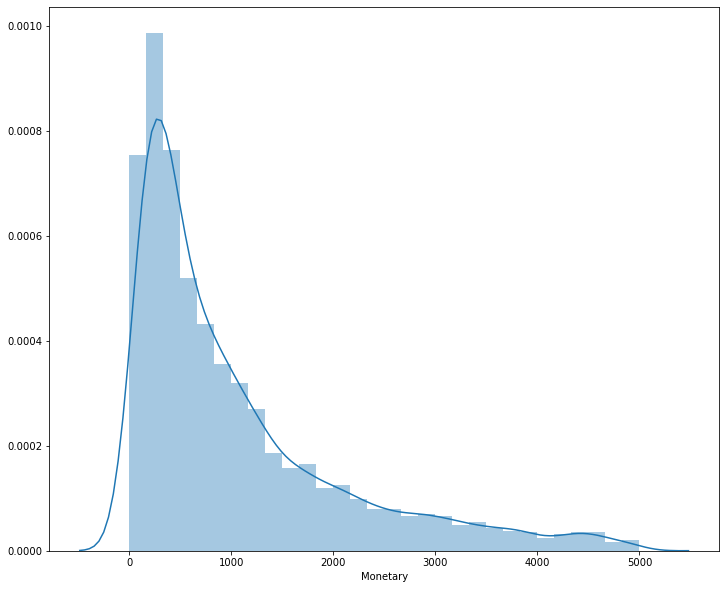

In [43]:
plt.figure(figsize=(12,10))
sns.distplot(UK_RFM_Clean['Monetary'],bins = 30)

In [44]:
UK_RFM_Clean[UK_RFM_Clean['Monetary'] == 0]

,Recency,Frequency,Monetary
Customer ID,,,
13256.0,15.0,1,0.0
14103.0,666.0,1,0.0
14827.0,666.0,1,0.0


In [45]:
UK_RFM[UK_RFM['Frequency'] < 0]

,Recency,Frequency,Monetary
Customer ID,,,


In [46]:
UK_RFM[UK_RFM['Recency'] == 0]


,Recency,Frequency,Monetary
Customer ID,,,


In [47]:
UK_RFM_Clean = UK_RFM_Clean[UK_RFM_Clean['Monetary'] > 0]  # clean up orders that has no revenue 

In [48]:
UK_RFM_Clean.describe()

,Recency,Frequency,Monetary
count,4586.000000,4586.000000,4586.000000
mean,228.184693,66.715438,1049.322418
std,213.257249,67.995384,1054.645095
min,1.000000,1.000000,2.950000
25%,37.000000,17.000000,300.732500
50%,154.000000,42.000000,660.685000
75%,400.750000,92.000000,1418.425000
max,739.000000,325.000000,4993.270000


# RFM Customer Segmentation 

In this section, I will create an RFM customer segmentation table where I segment customers by using the RFM table created in the last section. 

**Step1: Divide UK_RFM into 5 quantiles**

In [49]:
UK_RFM_Clean["RecencyScore"] = pd.qcut(UK_RFM_Clean["Recency"],5,labels = [5,4,3,2,1])
UK_RFM_Clean["MonetaryScore"] = pd.qcut(UK_RFM_Clean['Monetary'], 5, labels = [1, 2, 3, 4, 5])
UK_RFM_Clean["FrequencyScore"] = pd.qcut(UK_RFM_Clean["Frequency"],5, labels=[1,2,3,4,5])
UK_RFM_Clean # recency - 5 (most recent); Monetary 5 (Spend the most); Frequency 5(order the most times)


<ipython-input-49-907e0c23de86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UK_RFM_Clean["RecencyScore"] = pd.qcut(UK_RFM_Clean["Recency"],5,labels = [5,4,3,2,1])
<ipython-input-49-907e0c23de86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UK_RFM_Clean["MonetaryScore"] = pd.qcut(UK_RFM_Clean['Monetary'], 5, labels = [1, 2, 3, 4, 5])
<ipython-input-49-907e0c23de86>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

,Recency,Frequency,Monetary,RecencyScore,MonetaryScore,FrequencyScore
Customer ID,,,,,,
12608.0,405.0,16,415.79,2,2,2
12745.0,487.0,22,723.85,1,3,2
12746.0,541.0,17,254.55,1,2,2
12777.0,458.0,26,519.45,1,3,2
12819.0,459.0,19,540.52,1,3,2
...,...,...,...,...,...,...
18282.0,8.0,12,178.05,5,1,1
18284.0,432.0,28,461.68,1,2,2
18285.0,661.0,12,427.00,1,2,1


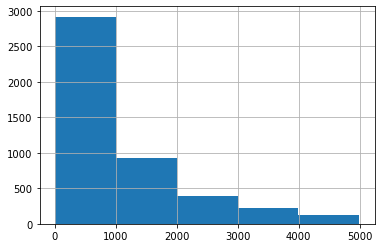

In [50]:
UK_RFM_Clean['Monetary'].hist(bins = 5)

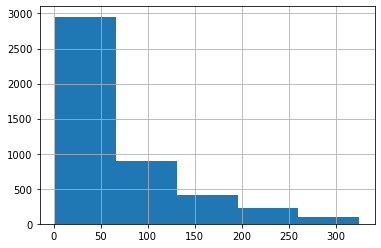

In [51]:
UK_RFM_Clean['Frequency'].hist(bins = 5)

**Step2 : Drop Unnecessary Columns**

In [52]:
RMF_Score = UK_RFM_Clean.drop(['Recency','Frequency','Monetary'],axis = 1)
RMF_Score.head()

,RecencyScore,MonetaryScore,FrequencyScore
Customer ID,,,
12608.0,2,2,2
12745.0,1,3,2
12746.0,1,2,2
12777.0,1,3,2
12819.0,1,3,2


**Step3 : Define Customer Segments using human words**

**RFM cell(Best Customer)**

Every business has its own definition on the most valuable customer segment(Best Customer). For each marketing compaign, company may put different weights on recency, monetary, and frequency and then average them up to find the most valuable customers. For this dataset, I will simply average the three scores to come up with an RFM cell. 

**Customer Segments**: 

Best Customer: The biggest customer with high(5,5,5) values in all 3 factors that should be targeted with special promotions to keep them active as the VIP. 

Inactive Customer: Customers with low recency but high value(1,N,5) were once valueable customers but stopped to be active. You may reactivate them with marketing compaign such as coupon-email. 

New Customer: Customers with high recency but low frequency(5,1,N) were new customer. A target follow up may convert them into repeat customers. 

Loyal customers: Buy on a regular basis. Responsive to promotions.

Potential loyalist: Recent customers with average frequency.

Recent customers: Bought most recently, but not often.

Promising: Recent shoppers, but haven’t spent much.

Needs attention: Above average recency, frequency and monetary values. May not have bought very recently though.

About to sleep: Below average recency and frequency. Will lose them if not reactivated.

At risk: Some time since they’ve purchased. Need to bring them back!

Can’t lose them: Used to purchase frequently but haven’t returned for a long time.

Hibernating: Last purchase was long back and low number of orders. May be lost.

The above segments and labels are frequently used as a starting point but you can come up with your own segments and labels that is better fits for your customer base and business model.






In [53]:
RMF_Score['RFM Cell'] = RMF_Score['RecencyScore'].astype('int') + RMF_Score['MonetaryScore'].astype('int') + RMF_Score['FrequencyScore'].astype('int')
RMF_Score['RFM Cell'] = RMF_Score['RFM Cell'].apply(lambda x : round(x/3,1))
RMF_Score[RMF_Score['RFM Cell'] == 5] #239 best customers with high value in all 3 factors 

,RecencyScore,MonetaryScore,FrequencyScore,RFM Cell
Customer ID,,,,
12820.0,5,5,5,5.0
12826.0,5,5,5,5.0
12856.0,5,5,5,5.0
12877.0,5,5,5,5.0
12935.0,5,5,5,5.0
...,...,...,...,...
18210.0,5,5,5,5.0
18219.0,5,5,5,5.0
18230.0,5,5,5,5.0


In [54]:
def segment (df):
    
    if df['RFM Cell'] == 5:
        return 'Best_Customer'
    if df['RecencyScore'] == 1 & df['MonetaryScore'] == 5:
        return 'Inactive_Customer'#inactive customer but used to spend a lot 
    if df['RecencyScore'] == 5 & df['FrequencyScore'] == 1:
        return 'New_Customer'#first time customer 
    if df['RecencyScore'] >= 3 & df['FrequencyScore'] >= 3 & df['MonetaryScore'] >= 3:
        return 'Potential Loyalist' #recent customers with average frequency.
    if df['RecencyScore'] == 1 & df['FrequencyScore'] == 1:
        return 'Hibernating'#Lost customer 
    if df['RecencyScore'] >= 3 & df['MonetaryScore'] <= 3:
        return 'promising' #Recent shoppers, but haven’t spent much.
    if df['RecencyScore'] < 3 & df['FrequencyScore'] >= 3 & df['MonetaryScore'] >= 3:
        return 'Bring Back' #Some time since they’ve purchased. Need to bring them back!
    if df['RecencyScore'] >= 3 & df['FrequencyScore'] >= 3:
        return 'loyal customer'
    if df['RecencyScore'] < 3 & df['FrequencyScore'] < 3:
        return'About to sleep' #Below average recency and frequency. Will lose them if not reactivated.
    else:
        return'customer'


In [55]:
RMF_Score.apply(segment, axis = 1)

Customer ID
12608.0         promising
12745.0    About to sleep
12746.0    About to sleep
12777.0    About to sleep
12819.0    About to sleep
                ...      
18282.0         promising
18284.0    About to sleep
18285.0      New_Customer
18286.0         promising
18287.0         promising
Length: 4586, dtype: object

In [56]:
RMF_Score['customer_segment'] = RMF_Score.apply(segment, axis = 1)


In [57]:
RMF_Score['customer_segment'].value_counts()

promising             3108
New_Customer           549
Potential Loyalist     243
Best_Customer          239
About to sleep         170
customer               158
Bring Back              87
Hibernating             32
Name: customer_segment, dtype: int64

In [58]:
#Remember that we labled our 'Outlier' customers as business partners before, so let's union them together. 
Final_DF = pd.concat([RMF_Score,UK_Outlier])

Final_DF['customer_segment']

Customer ID
12608.0           promising
12745.0      About to sleep
12746.0      About to sleep
12777.0      About to sleep
12819.0      About to sleep
                 ...       
18231.0    Business Partner
18245.0    Business Partner
18251.0    Business Partner
18260.0    Business Partner
18283.0    Business Partner
Name: customer_segment, Length: 5350, dtype: object

**For each of the segments, we could design appropriate actions, for example:**

Best_customer: Reward them. They can become evangelists and early adopters of new products.

Potential loyalist: Recommend other products. Engage in loyalty programs.

New customers: Provide a good onboarding process. Start building the relationship.

Promising: Create more brand awareness. Provide free trials.

About to sleep: Reactivate them. Share valuable resources. Recommend popular products. Offer discounts.

Bring Back : Win them back. Talk to them. Make them special offers. Make them feel valuable.

Hibernating: Recreate brand value. Offer relevant products and good offers.

Text(0, 0.5, '# of customers')

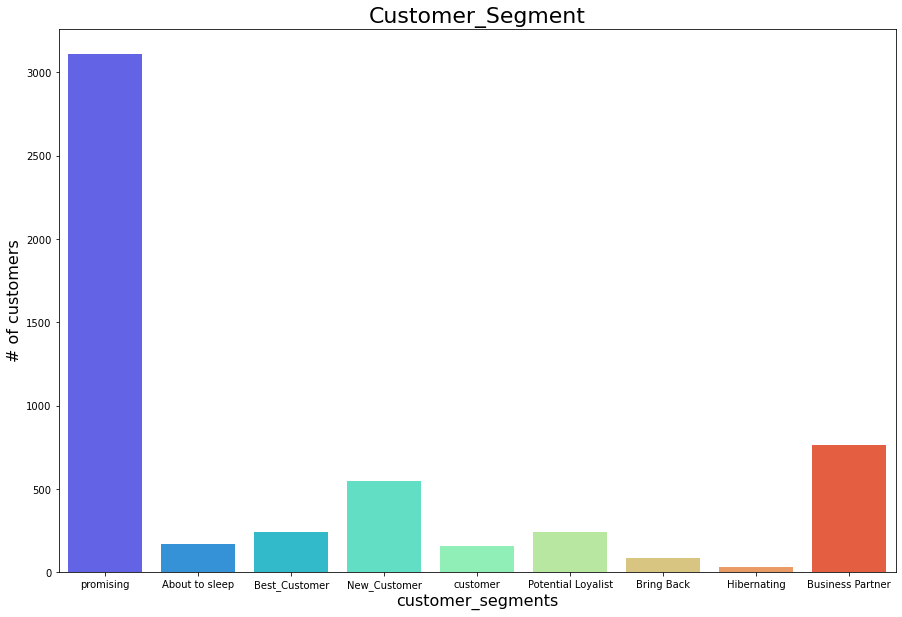

In [59]:
plt.figure(figsize = (15,10))
sns.countplot(Final_DF['customer_segment'],palette = 'rainbow')
plt.title('Customer_Segment',fontsize=22)
plt.xlabel('customer_segments',fontsize=16)
plt.ylabel('# of customers',fontsize=16)
#nearly 60% of customers are promising customer who shopped recently but did not spend much yet. 
# Strategy: Marketing team could create more brand awareness and provide free trials.
#10% of the customers are new customer who only shopped once at most recent 
# strategy: send follow up email to build good relationship 
#14% of the customers are business partner who order expensive item or order frequently and spend much. 
#strategy: Stay close connection and make sure to have high product quality and meet their quantity requirement asap.


# K means clustering 

I have mannually grouped customers into 9 categories and provided some potential marketing strategies to each customer group. 

Another popular way to cluster customers into groups is to **combine RFM analysis and K means clustering model** to find target customer segment.

I will compare my first mannual results to the results from k-means clustering and imporve customer segmentations eventually. 

**How K Means Clustering Algorithm Work?**

1. Specify number of clusters K.
2. Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.
3. Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.

Since I would be passing the three features to a k-means algorithem, which is easily influenced by extreme values, I have to watch out for outliers and non-normal distribution. 

# Data Preprocessing & Exploring 

In [60]:
#Use RMF_Score for K-means clustering & Drop columns no need anymore 
UK_RFM_Clean = UK_RFM_Clean.drop(['RecencyScore','MonetaryScore','FrequencyScore'],axis = 1)
UK_RFM_Clean

,Recency,Frequency,Monetary
Customer ID,,,
12608.0,405.0,16,415.79
12745.0,487.0,22,723.85
12746.0,541.0,17,254.55
12777.0,458.0,26,519.45
12819.0,459.0,19,540.52
...,...,...,...
18282.0,8.0,12,178.05
18284.0,432.0,28,461.68
18285.0,661.0,12,427.00


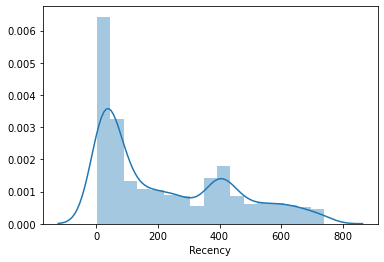

In [61]:
#visualizing variables 
sns.distplot(UK_RFM_Clean['Recency'])

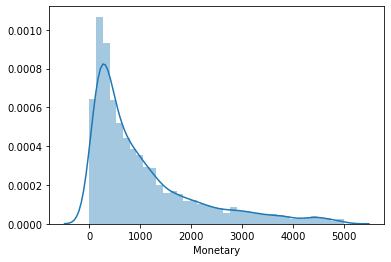

In [62]:
sns.distplot(UK_RFM_Clean['Monetary'])

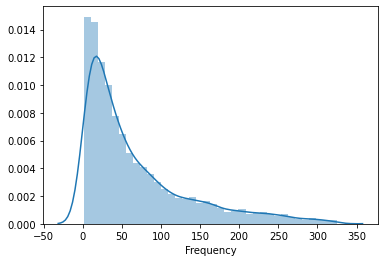

In [63]:
sns.distplot(UK_RFM_Clean['Frequency'])

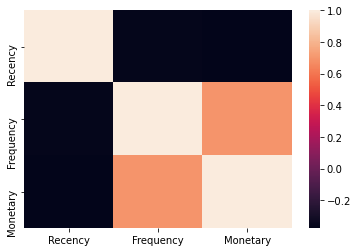

In [64]:
sns.heatmap(UK_RFM_Clean.corr())#Frequency & Monetary are relatively high correlated 


## Data Normalization 
Since clustering algorithms including kmeans use distance-based measurements to determine the similarity between data points, it’s recommended to standardize the data to have a mean of zero and a standard deviation of one since almost always the features in any dataset would have different units of measurements such as age vs income.

In this dataset, I need to normalize features to avoid building biased k-means model as units of frequency and monetary are different. Because all feature distributions are skewed to the right, I would perform log transformation to reduce the skewness. In the meanwhile, I would scale the datasets using standardscaler as well. 

In [65]:
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

In [66]:
UK_RFM_Norm = (np.log(UK_RFM_Clean))

In [67]:
#Use standardscaler to normalize data 
scaler = StandardScaler()
UK_transformed = scaler.fit_transform(UK_RFM_Norm)


UK_transformed = pd.DataFrame(UK_transformed)
UK_transformed.columns = UK_RFM_Clean.columns
UK_transformed


,Recency,Frequency,Monetary
0,0.888972,-0.673430,-0.370321
1,1.013567,-0.416246,0.134045
2,1.084627,-0.624469,-0.816718
3,0.972078,-0.281332,-0.167821
4,0.973552,-0.534643,-0.131649
...,...,...,...
4581,-1.763018,-0.905763,-1.141890
4582,0.932584,-0.221482,-0.275079
4583,1.220005,-0.905763,-0.346119
4584,0.999546,0.483142,0.664230


In [68]:
UK_transformed.describe()

,Recency,Frequency,Monetary
count,4.586000e+03,4.586000e+03,4.586000e+03
mean,-2.634903e-16,2.188490e-17,-5.401988e-16
std,1.000109e+00,1.000109e+00,1.000109e+00
min,-3.168224e+00,-2.912581e+00,-4.872079e+00
25%,-7.281048e-01,-6.244693e-01,-6.650415e-01
50%,2.355404e-01,1.059725e-01,5.097846e-02
75%,8.818426e-01,7.392295e-01,7.460462e-01
max,1.295382e+00,1.758454e+00,1.891000e+00


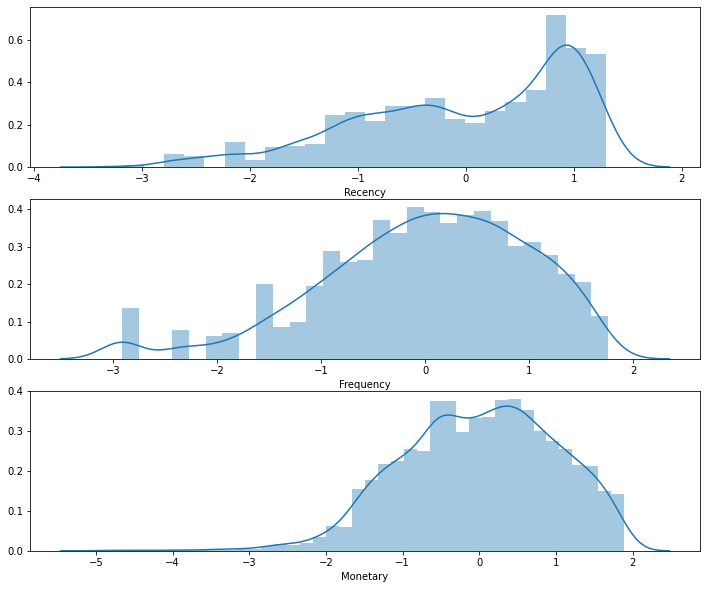

In [69]:
plt.figure(figsize=(12,10))
plt.subplot(3, 1, 1); sns.distplot(UK_transformed['Recency'])
plt.subplot(3, 1, 2); sns.distplot(UK_transformed['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(UK_transformed['Monetary'])
plt.show()

## Define the optimal K (number of cluseter) using Elbow method

Elbow method gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters’ centroids. I pick k at the spot where SSE starts to flatten out and forming an elbow. Ideally, we would like to minimize SSE.

Steps to find the optimal K using Elbow method:
1. Compute K-Means clustering for different values of K by varying K from 1 to 10 clusters.
2. For each K, calculate the total within-cluster sum of square (WCSS).
3. Plot the curve of WCSS vs the number of clusters K.

**The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.**


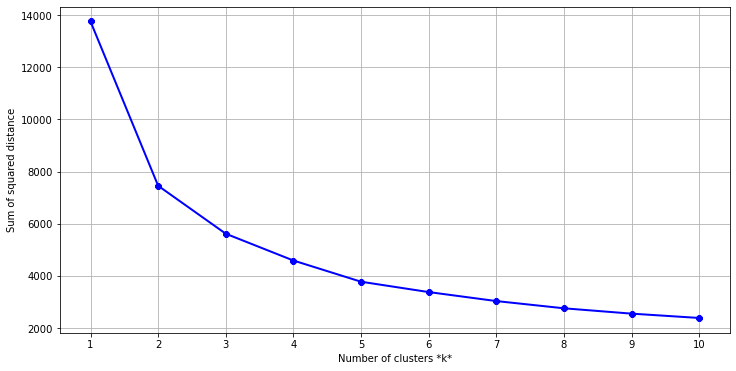

In [70]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(UK_transformed)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="blue", marker ="8")
plt.xlabel(r'Number of clusters *k*')
plt.xticks(np.arange(1,11,1))
plt.ylabel('Sum of squared distance')
plt.show()

**The optimal K value is found to be 4 using the elbow methods because the next k-value tend to have a linear trend.**

## Define the optimal K (number of cluseter) using Silhouette Analysis 
Another common way to define K number of cluster is Silhouette analysis which can be used to determine the degree of separation between clusters. For each sample:
1. Compute the average distance from all data points in the same cluster (ai).
2. Compute the average distance from all data points in the closest cluster (bi).
3. Compute the coefficient: (bi - ai) / max(bi,ai)

The coefficient can take values in the interval [-1, 1].

1. If it is 0 –> the sample is very close to the neighboring clusters.
2. If it is 1 –> the sample is far away from the neighboring clusters.
3. If it is -1 –> the sample is assigned to the wrong clusters.

Therefore, we want the coefficients to be as big as possible and close to 1 to have a good clusters.

**All the Silhouette coefficient is smaller than 0.5 indicating that there is not much distinction between clusters. However, the optimal K value can be 4 or 5 as their coefficients are the lager than that of other k values**


In [71]:
from sklearn.metrics import silhouette_samples, silhouette_score

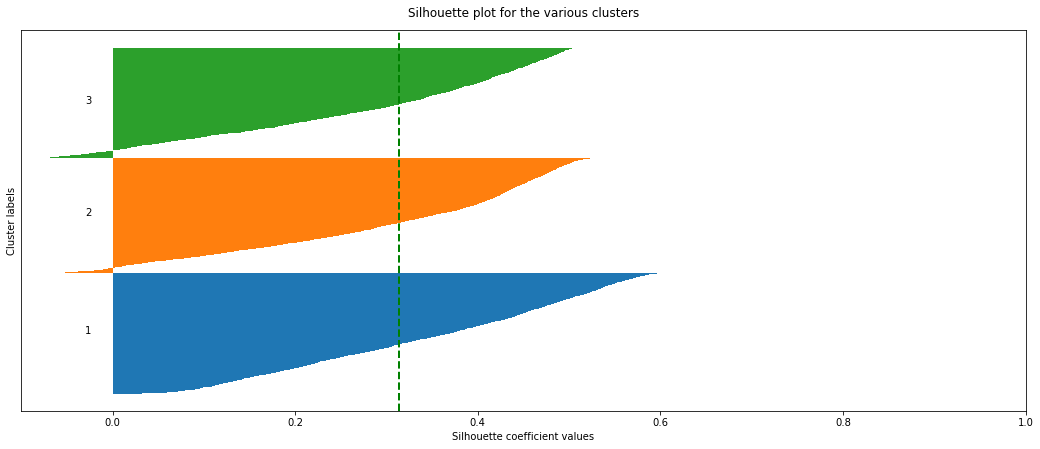

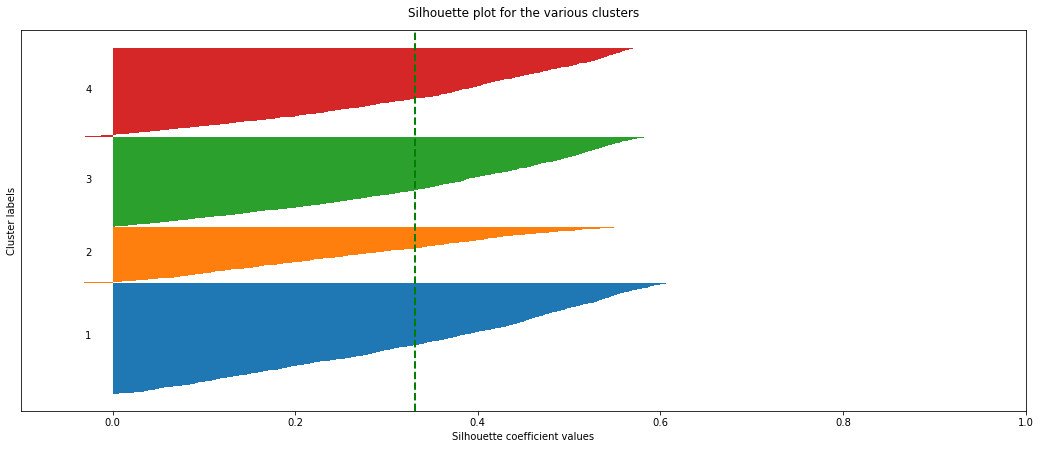

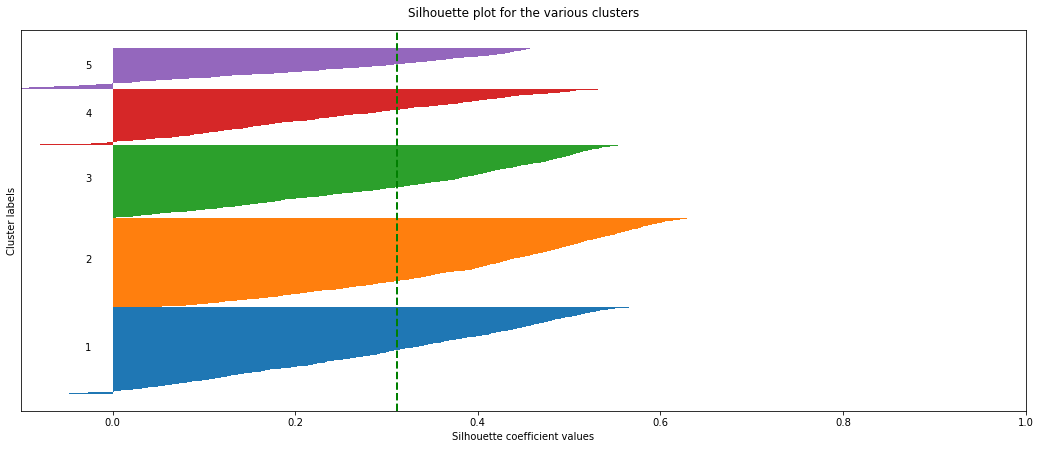

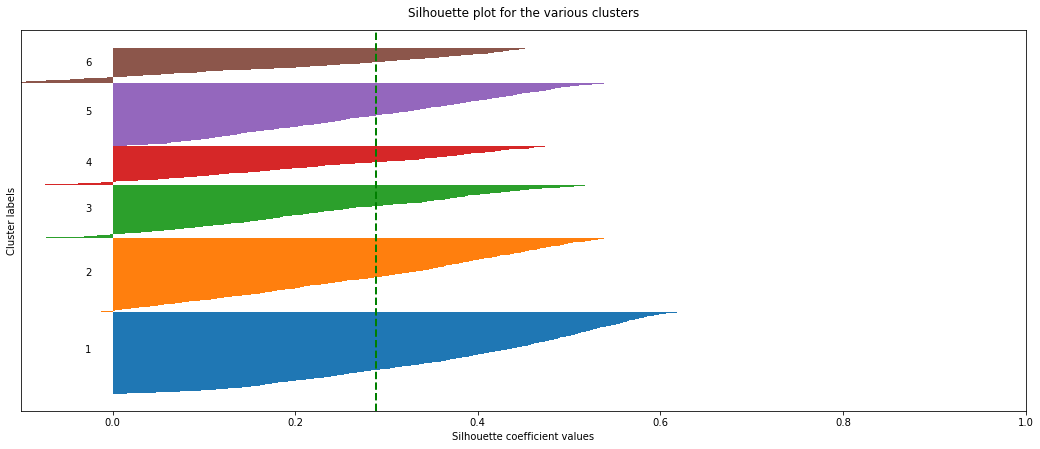

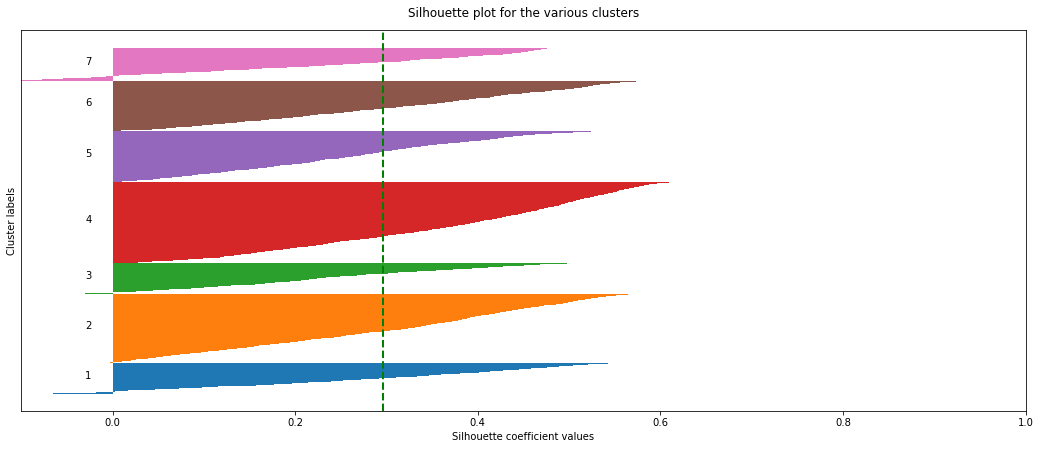

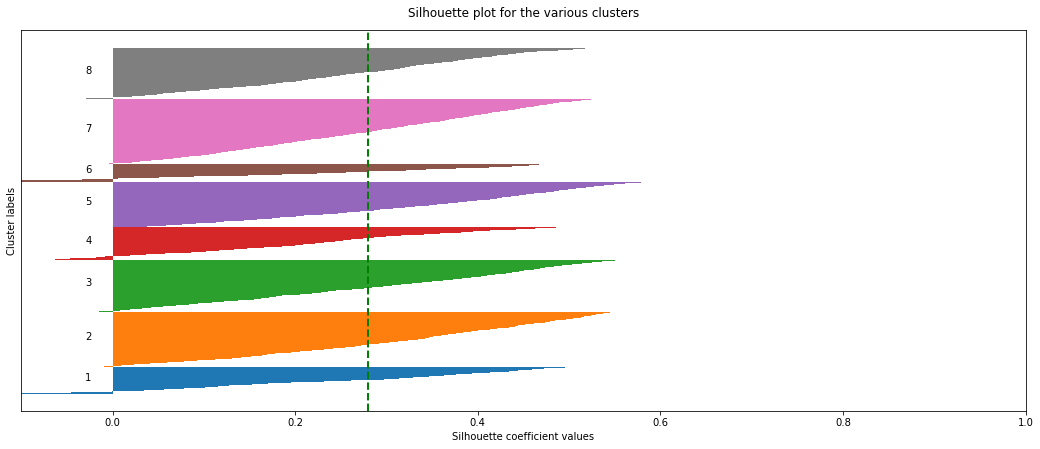

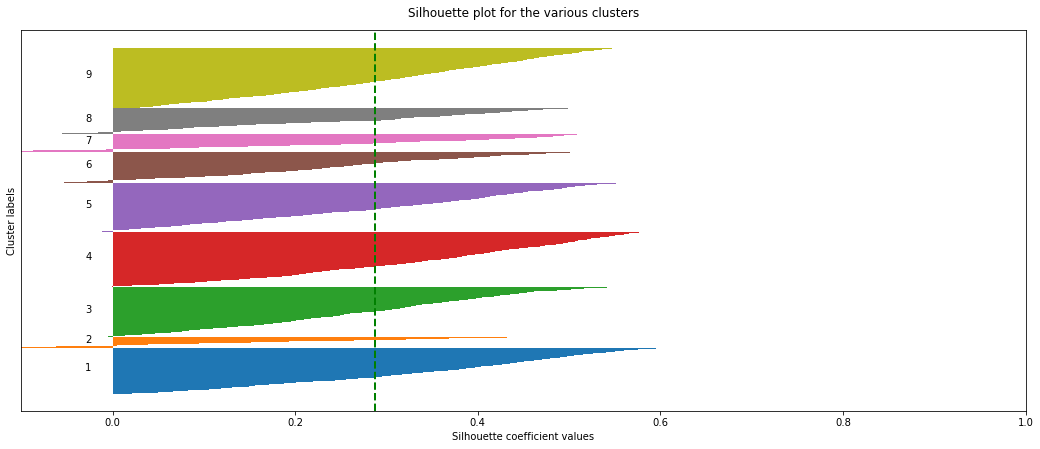

In [72]:

for i, k in enumerate([3,4,5,6,7,8,9]):
    fig, ax1 = plt.subplots(1)
    
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(UK_transformed)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(UK_transformed, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
        

**Based on the observation from these two methods, I choose k = 4 as optimal number of clusters for further analysis in each cluster. My next step is to fit the model. By fitting the model, we can have clusters where each data belongs. By that, I can analyze the data.**

## Fitting K-means Model & Assigning Lables 

In [73]:
kmeans = KMeans(n_clusters = 4, random_state = 1)
kmeans.fit(UK_transformed)
#extract cluster labels
cluster_labels = kmeans.labels_
        
# Create a cluster label column in original dataset
UK_transformed['Cluster'] =  cluster_labels

## Interpret The Segment

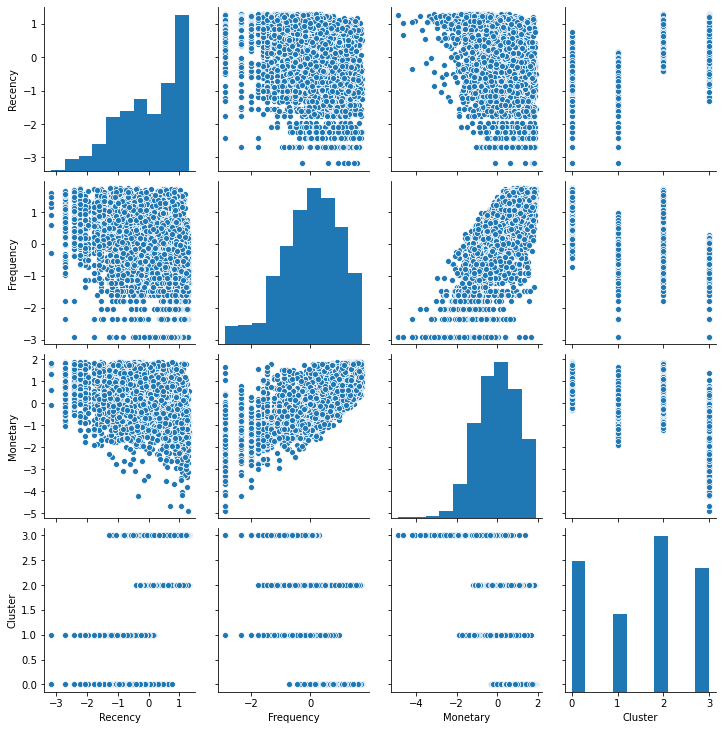

In [74]:
sns.pairplot(UK_transformed)

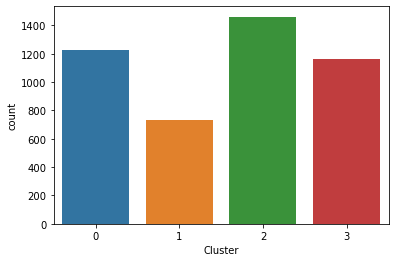

In [75]:
sns.countplot('Cluster',data = UK_transformed) # cluster1 has highest number of customers & Cluster 3 has the lowest number of clusters

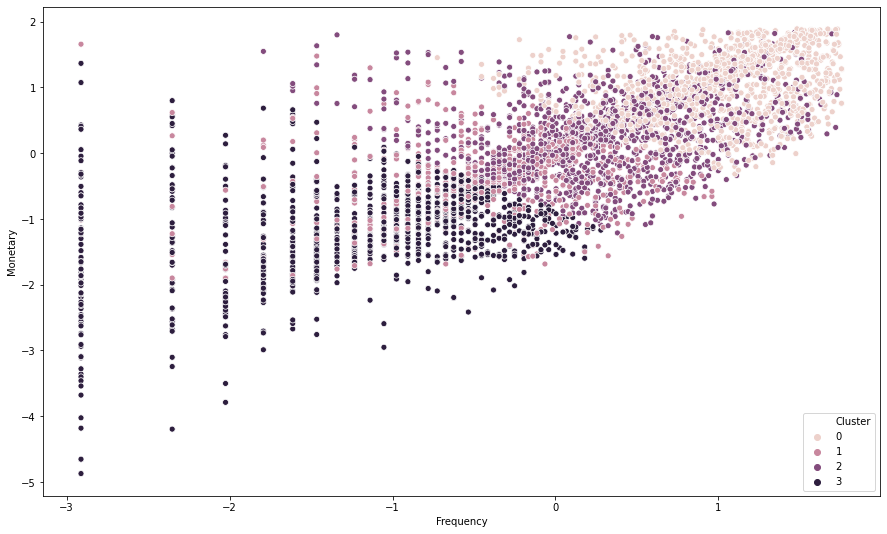

In [76]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Frequency', y='Monetary', hue='Cluster', data=UK_transformed, legend='full')
#cluster 1 has low frequency; cluster 2 and 4 has high frequency and monetary 

In [77]:
#summarize the RFM table based on clusters and calculate the mean of each variable.
UK_transformed.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(2)


Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0         -1.00      0.97     1.02  1228
1         -0.91     -0.37    -0.38   732
2          0.65      0.29     0.26  1462
3          0.81     -1.16    -1.15  1164

In [78]:
UK_transformed

,Recency,Frequency,Monetary,Cluster
0,0.888972,-0.673430,-0.370321,3
1,1.013567,-0.416246,0.134045,2
2,1.084627,-0.624469,-0.816718,3
3,0.972078,-0.281332,-0.167821,2
4,0.973552,-0.534643,-0.131649,2
...,...,...,...,...
4581,-1.763018,-0.905763,-1.141890,1
4582,0.932584,-0.221482,-0.275079,2
4583,1.220005,-0.905763,-0.346119,3
4584,0.999546,0.483142,0.664230,2


Use Snake Plot to have a good visualization from the data on how the cluster differs from each other.

Specifically, Snake Plot can be used to build personas of each cluster of the segmentation. It is commonly used in the marketing industry for customer segmentation.

Brief Segment interpretation:

    Cluster 0(Inactive Customer): high frequency & high Monetary value but inactive for long time 
    Cluster 1(Nearly lost customer): below average frequency and monetary value and inactive for long time 
    Cluster 2(Promising Customer): average frequency & average Monetary value & active recently
    Cluster 3(New Customer): low Frequency & Low monetary & active most recent 

    

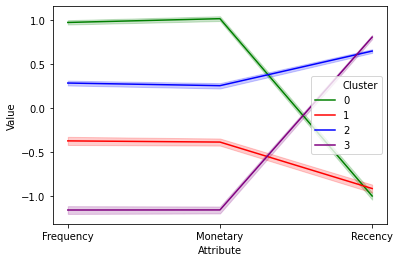

In [79]:
# Create the dataframe
df_normalized = pd.DataFrame(UK_transformed, columns=['Recency', 'Frequency', 'Monetary'])
df_normalized['ID'] = UK_RFM_Clean.index
df_normalized['Cluster'] = cluster_labels
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','Monetary'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()
# Visualize it
sns.lineplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt,palette= ['green','red', 'blue','purple'])


# Recommendation To Marketing Team

Based on this plot, I would recommend followings to a marketing team: 

1. Cluster3(New Customer): These customers are new to this online retail company. Marketing for these customer could focus on encouraging them shop back by providing one-time coupon code in next day of purchase. 

2. Cluster2(Promising Customer): This is the segment where the company can easily turn into best customer. They shop often and dont place big orders but do shop recently. The company might nudge them to make more frequent and small to medium orders.

3. Cluster0(Inactive Customer): These customers used to be the company's best customer. They shopped frequent and ordered large numbers of product, but stopped to shop anymore. Marketing team needs to reactive this segment since it would bring in large revenue for company as their needs are huge once they started to order. 

4. Cluster1(Nearly Lost Customer): This customer segment may take marketing team the most effort to bring back. They never shopped often and spend much in the last 1.5 year and are not active either. Since this group has the lowest number of people among all groups and the potential ROI is relatively low, marketing team may not take them as first option to target. 

5. Business Partner: Wholesalers usually have long term business relationship with retail business. The company needs to try best to meet their needs on time since they are cash cows for the company. 

# Conclusion 

After compared k_means Clustering results against my original segmentation done using traditional methods, I noticed a couple things:
   1. I set 4 more groups than Kmeans model did indicating that the segments I grouped were not distinced enough for the model 
   2. The Cluster2, Inactive Customer, was identified by Kmeans model that I missed using traditional method.
    
K-means is a simple but powerful segmentation method. Anyone doing customer or market segmentation should use this to refine traditional methods. A good analysis can increase effectiveness and efficiency of marketing plans, hence increase profitability at minimum cost.

**Without it, I was not able to identify Inactive Customers who have great potential to become the company's best customers.** K-means clustering also saved analyst so much time by not manually labelling customers into groups. 
